Generate a dataset using numpy random as I had shown in the 1st class of this week. Train a linear regression model  using |x-xhat|3 as your loss function and a polynomial regression model using |x-xhat|7 as your loss function. (Note that you will need to derive the gradient descent algorithms for these functions yourselves). You are allowed to use only numpy, pandas and Matplotlib. Then train a linear regression model using the sklearn library on the same dataset. At last, plot the dataset and curves obtained from all models in the same figure.


Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import style
import math
from sklearn.linear_model import LinearRegression

Defining Functions

50


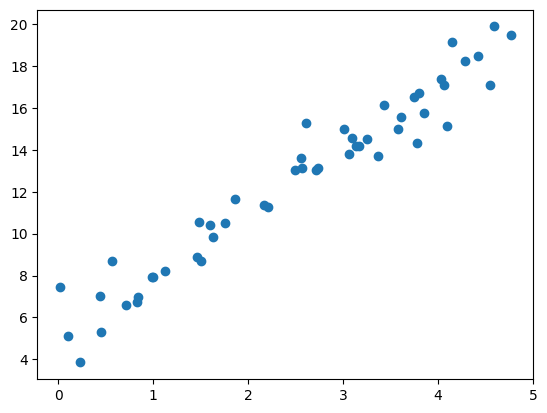

In [2]:
data = np.random.RandomState(10)
x= 5 * data.rand(50)
y= 3 * x + 5 + data.randn(50)
m=x.shape[0]
print(m)
plt.scatter(x,y)

In [3]:
def cost(x_hat, x):
    l=np.abs(x_hat-x) ** 3
    cost=l.mean()
    return cost

In [4]:
def hypothesis(y,w,b):
    return (y-b)/w

In [5]:
def gradient_descent(x,y,w,b,learning_rate,m):
   x_hat=hypothesis(y,w,b)
   dw = (3.0/m) * np.sum(np.multiply((-x)/w,(x_hat-x),np.abs(x_hat-x)))
   db = (3.0/m) * np.sum(np.multiply((-1)/w,(x_hat-x),np.abs(x_hat-x)))
   w = w -learning_rate * dw
   b = b - learning_rate * db
   return w,b

Implementation

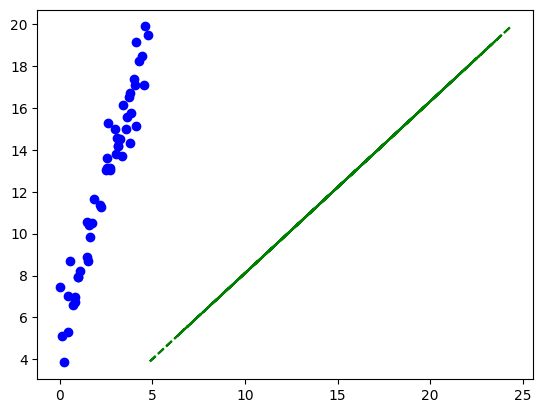

[0.82085384] [-0.1002678]


In [6]:
# Random Initialisation
w = np.random.randn(1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.0009
num_epochs = 200000

L=[]
plt.plot(x,y,'bo')
plt.plot((y-b)/w,y,'g--')
plt.show()
print(w,b)
for i in range(num_epochs):
    w, b = gradient_descent(x,y,w,b,learning_rate,m)
    x_hat = hypothesis(y,w,b)
    L.append(cost((y-b)/w,x))
   
     
     
    

obtained value of w: [2.94304576]
obtained value of b: [5.18451399]
obtained line: y=[2.94304576]x+[5.18451399]


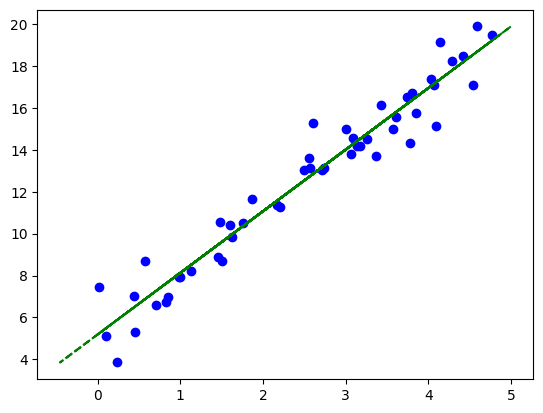

[2.94304576] [5.18451399]


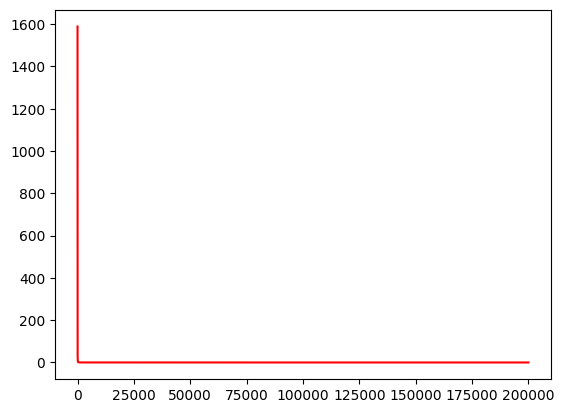

In [7]:
print("obtained value of w:",w)
print("obtained value of b:",b)
print(f"obtained line: y={w}x+{b}")
plt.plot(x,y,'bo')
plt.plot((y-b)/w,y,'g--')
plt.show()
print(w,b)

plt.plot(L,'r')
plt.show()

Using sklearn....

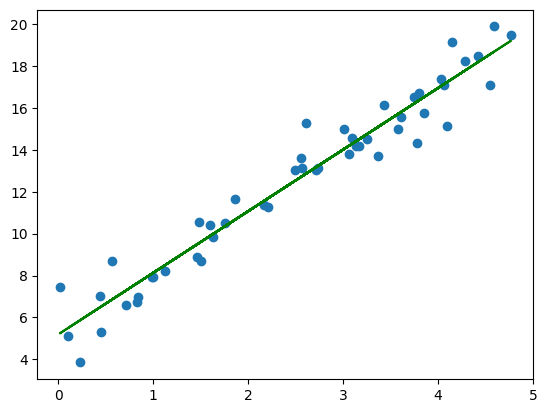

In [8]:
new_model=LinearRegression(fit_intercept = True)
new_model.fit(x[:,np.newaxis], y[:,np.newaxis])
y_predicted=new_model.predict(x[:,np.newaxis])
plt.scatter(x, y)
plt.plot(x, y_predicted,color='g')




In [9]:
print(new_model.intercept_)
print(new_model.coef_)

[5.18453672]
[[2.94303859]]


Polynomial Regression

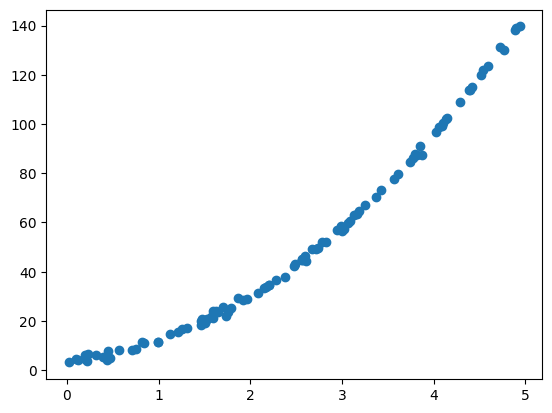

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.RandomState(10)
x = 5 * data.rand(100, 1)
y = 3 * x + 5 * x**2 + 4 + data.randn(100, 1)
m = x.shape[0]
plt.scatter(x, y)

In [11]:
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]


In [12]:
# Normalize the data
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

x_test_normalized = (x_test - x_mean) / x_std
y_test_normalized = (y_test - y_mean) / y_std


In [13]:
def add_polynomial_features(X, degree):
    X_poly = np.c_[X]  # Start with the original features
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]  # Add higher-degree features
    return X_poly

degree = 2
X_poly_train = add_polynomial_features(x_train_normalized, degree)
X_poly_test = add_polynomial_features(x_test_normalized, degree)

def custom_loss(X, X_pred):
    return np.mean(np.abs(X - X_pred)**7)

def custom_loss_gradient(X, X_pred):
    gradient = -7 * np.sign(X - X_pred) * np.abs(X - X_pred)**6
    return gradient


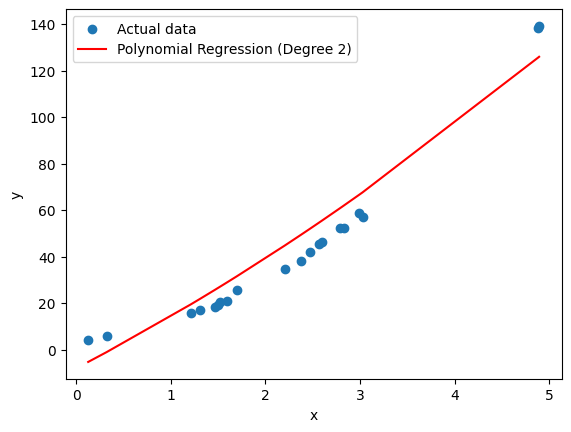

In [14]:
learning_rate = 0.001
num_epochs = 1000
m = len(y_train_normalized)
w = np.random.randn(X_poly_train.shape[1], 1)

for iteration in range(num_epochs):
    X_pred = X_poly_train.dot(w)
    gradients = X_poly_train.T.dot(custom_loss_gradient(y_train_normalized, X_pred))
    
    # Apply gradient clipping to prevent extremely large gradients
    gradients = np.clip(gradients, -1, 1)
    
    w = w - learning_rate * gradients.reshape(-1, 1)

X_pred_test = X_poly_test.dot(w)

# Denormalize the predictions
X_pred_test_denormalized = X_pred_test * y_std + y_mean

# Plot the results
plt.scatter(x_test, y_test, label='Actual data')
sorted_indices = np.argsort(x_test[:, 0])
plt.plot(x_test[sorted_indices], X_pred_test_denormalized[sorted_indices], color='r', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

using sklearn

importing libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [16]:
# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)


In [17]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


In [18]:
# Choose the degree of the polynomial
degree = 2

# Create a polynomial regression model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

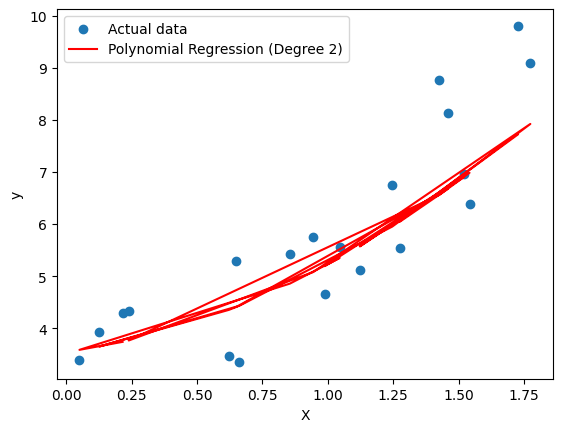

In [19]:
# Plot the results
plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred, color='r', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


 Dataset: Air quality of an Italian city
(https://archive.ics.uci.edu/ml/datasets/Air+quality)
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multi Sensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 values.

Your objective is to predict the Relative Humidity of a given point of time based on all other attributes
affecting the change in RH.

(i) Perform the data pre-processing steps on the dataset as explained in the class. Handle missing values, get insights from correlation matrix and deal with outliers.

(ii) Split the dataset into a 85:15 ratio into training and test dataset using the sklearn library.

(iii) Train a linear regression model from scratch using only numpy, pandas and matplotlib and train a linear regression model using the sklearn library on the training dataset.

(iv) Calculate the r2 score and mean squared error using the test dataset. Compare the results obtained and plot your results.



In [20]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Part 1

In [21]:
df=pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [23]:
df.isnull().sum()
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


Dealing with missing values::::

In [24]:
df=df.replace(-200,np.nan)
for i in range(2,15):
 df.iloc[:,i].fillna(int(df.iloc[:,i].mean()), inplace=True)

In [25]:
num_col=df.select_dtypes(include=['float64','int64']).columns
matrix=df[num_col].corr()
RH_corr=matrix['RH'].sort_values(ascending=False)
print(RH_corr)
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.info()

RH               1.000000
NOx(GT)          0.192215
AH               0.167990
PT08.S5(O3)      0.124952
PT08.S1(CO)      0.114609
CO(GT)           0.042033
PT08.S4(NO2)    -0.032188
NMHC(GT)        -0.052755
PT08.S3(NOx)    -0.056729
C6H6(GT)        -0.061637
NO2(GT)         -0.080914
PT08.S2(NMHC)   -0.090351
T               -0.578533
Name: RH, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 1

Dealing with outliers:

Number of outliers removed: 20
Z-Score Threshold: 5


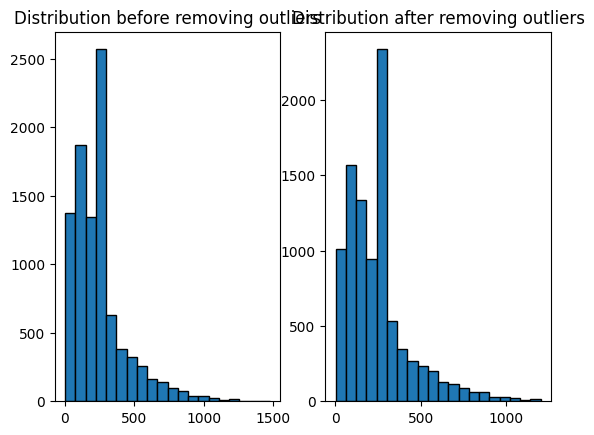

Number of outliers removed: 12
Z-Score Threshold: 5


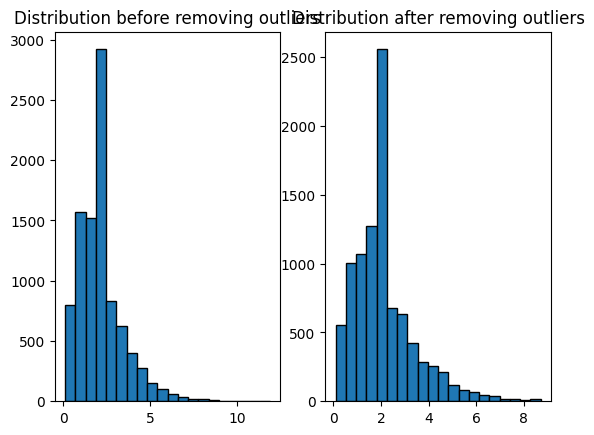

Number of outliers removed: 0
Z-Score Threshold: 5


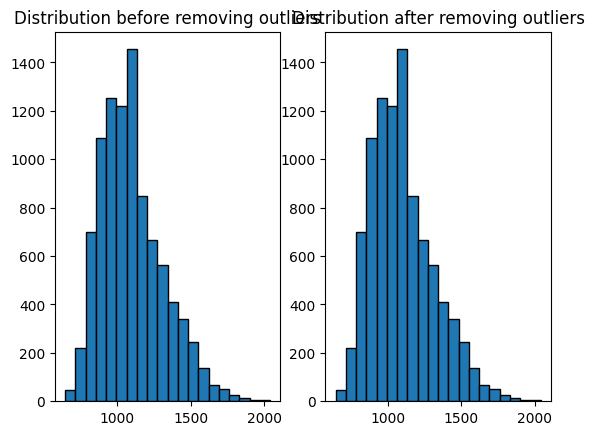

Number of outliers removed: 85
Z-Score Threshold: 5


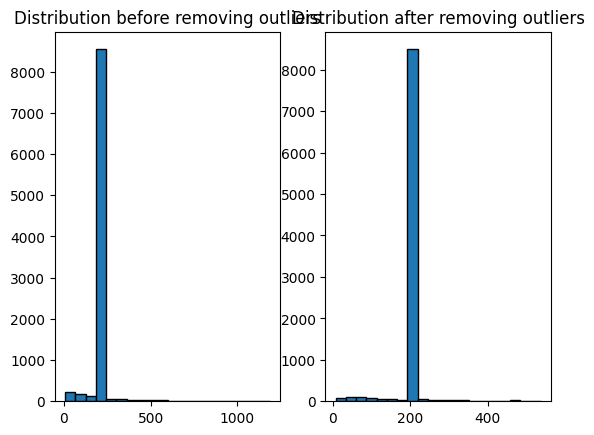

Number of outliers removed: 10
Z-Score Threshold: 5


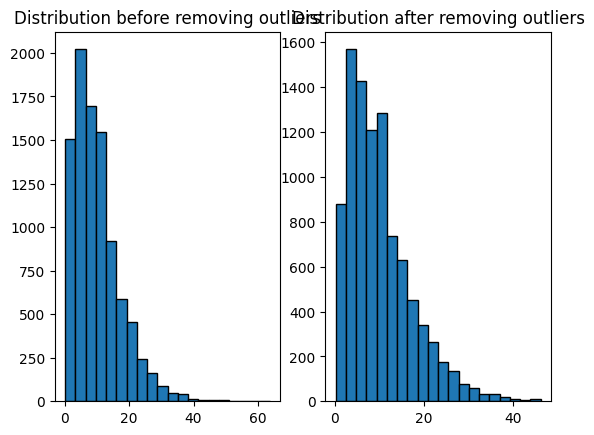

Number of outliers removed: 0
Z-Score Threshold: 5


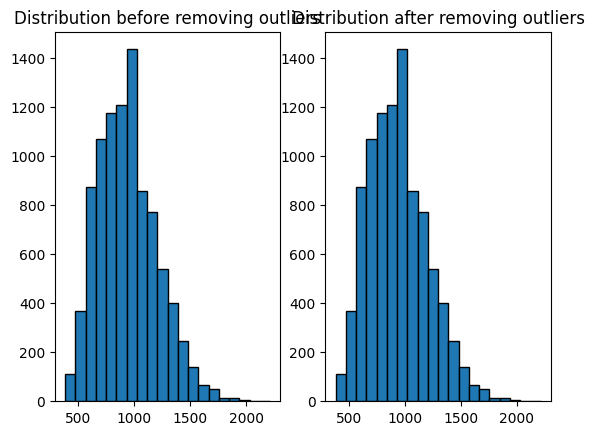

Number of outliers removed: 10
Z-Score Threshold: 5


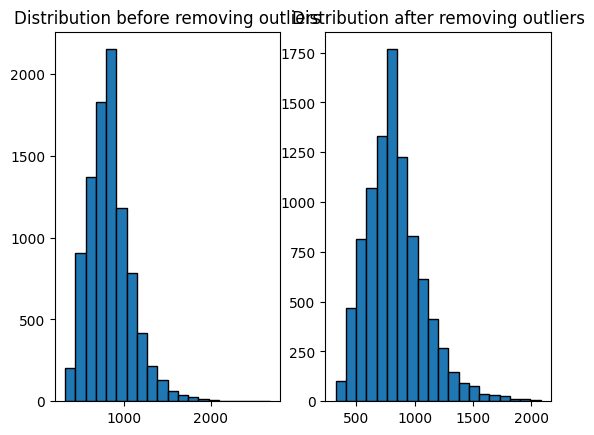

Number of outliers removed: 1
Z-Score Threshold: 5


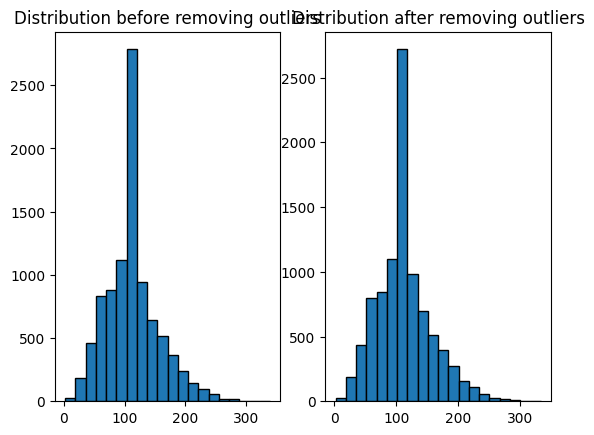

Number of outliers removed: 0
Z-Score Threshold: 5


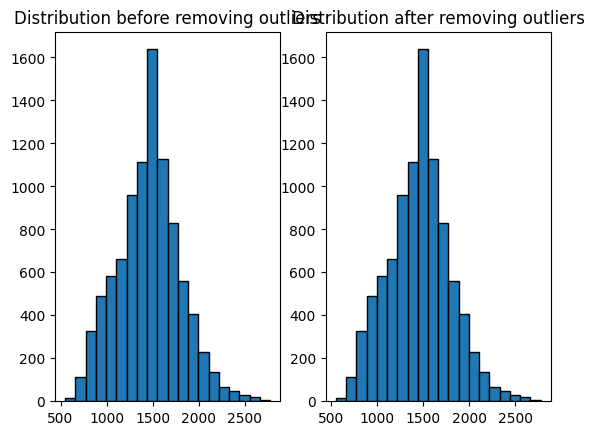

Number of outliers removed: 0
Z-Score Threshold: 5


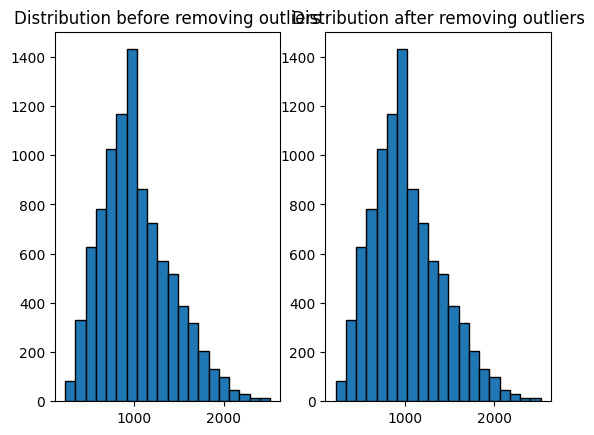

In [26]:
def remove_outliers_zscore(df, feature, z_score_threshold=5):
    # 1. Calculate the mean and standard deviation
    mean_value = df[feature].mean()
    std_dev = df[feature].std()

    # 2. Calculate Z-scores for each data point
    df['z_score'] = (df[feature] - mean_value) / std_dev

    # 3. Identify and remove outliers
    outliers = df[abs(df['z_score']) > z_score_threshold]
    df_no_outliers = df[abs(df['z_score']) <= z_score_threshold]

    # 4. Display information about removed outliers
    print("Number of outliers removed:", len(outliers))
    print("Z-Score Threshold:", z_score_threshold)

    # 5. Optional: Visualize the distribution before and after removing outliers
    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title('Distribution before removing outliers')

    plt.subplot(1, 2, 2)
    plt.hist(df_no_outliers[feature], bins=20, edgecolor='black')
    plt.title('Distribution after removing outliers')

    plt.show()

    # 6. Return the DataFrame without outliers
    return df_no_outliers.drop(columns=['z_score'])

# Example usage:
# Replace 'YourFeatureColumnName' with the actual name of the column containing outliers
df_no_outliers = remove_outliers_zscore(df, 'NOx(GT)')
df_no_outliers = remove_outliers_zscore(df, 'CO(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S1(CO)')
df_no_outliers = remove_outliers_zscore(df, 'NMHC(GT)')
df_no_outliers = remove_outliers_zscore(df, 'C6H6(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S2(NMHC)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S3(NOx)')
df_no_outliers = remove_outliers_zscore(df, 'NO2(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S4(NO2)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S5(O3)')


Part 2

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X=df.drop(columns='RH')
Y=df['RH']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)

(7953, 13)
(1404, 13)


Part 3

In [28]:
def cost(y_hat, y_train):
    l = (y_hat - y_train) ** 2
    cost = l.mean()
    return cost

In [29]:
W = np.zeros(X_train.shape[1])

def gradient_descent(X_train, y_train, W, learning_rate, num_epochs):
    L=[]
    for _ in range(num_epochs):
        y_hat = np.dot(X_train, W)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        W -= learning_rate * gradient
        L.append(cost(y_hat, y_train))

    return W,L


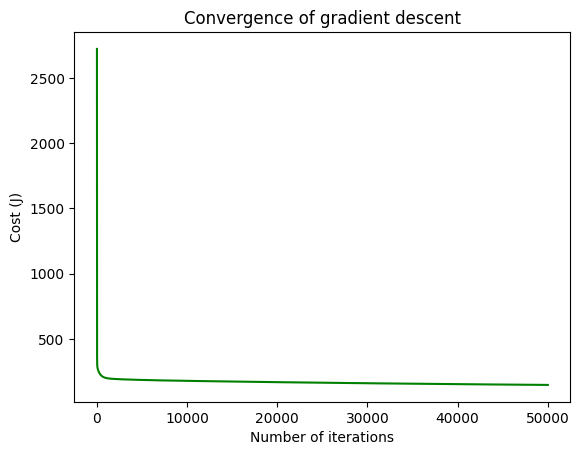

In [30]:
# Hyperparameters
learning_rate = 0.0000003
num_epochs = 50000

#Calling Gradient descent
W,L = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

#Plotting Cost v/s Iterations
plt.plot(range(1, num_epochs + 1), L, color='g')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

y_hat_t= np.dot(X_test, W)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Part 4

Mean Squared Error on Test Set: 148.3843016595788
R2 Score: 0.48848445249457695


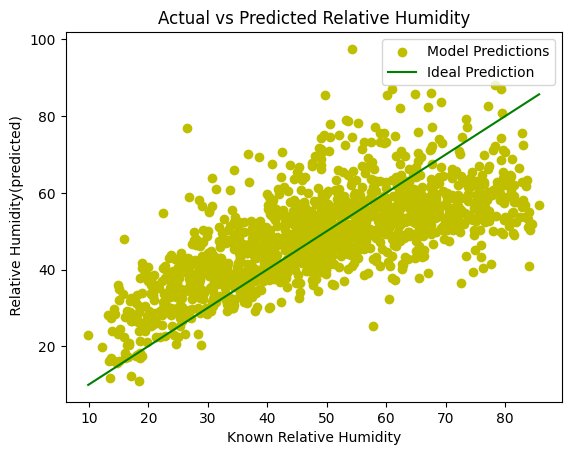

In [32]:
# Evaluating the model
mse1 = mean_squared_error(y_test, y_hat_t)
print("Mean Squared Error on Test Set:", mse1)
r2_1 = r2_score(y_test,y_hat_t)
print("R2 Score:", r2_1)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_t,color='y', label="Model Predictions")
plt.xlabel("Known Relative Humidity")
plt.ylabel(" Relative Humidity(predicted)")
plt.title("Actual vs Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='g',  label='Ideal Prediction')
plt.legend()
plt.show()



by sklearn

Mean Squared Error on Test Set: 35.301808295429915
R2 Score: 0.8783063734087221


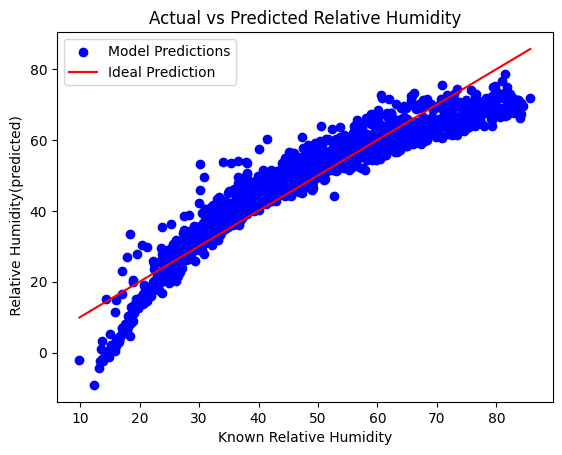

In [33]:
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse2)
r2_2 = r2_score(y_test,y_pred)
print("R2 Score:", r2_2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='b', label="Model Predictions")
plt.title("Actual vs Predicted Relative Humidity")
plt.xlabel("Known Relative Humidity")
plt.ylabel(" Relative Humidity(predicted)")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='r',  label='Ideal Prediction')
plt.legend()
plt.show()



on one plot

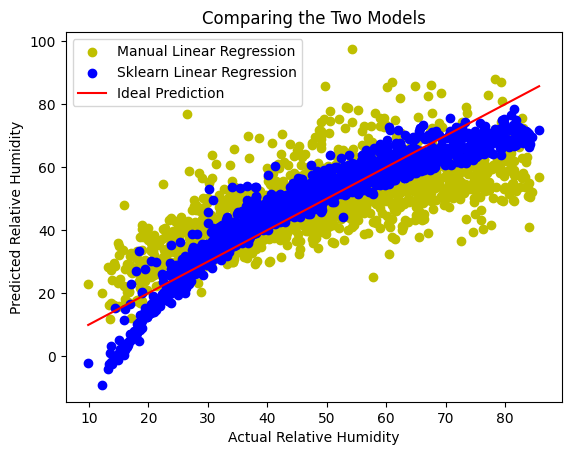

In [34]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_hat_t,color='y', label='Manual Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.title("Comparing the Two Models")
plt.legend()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='b',label='Sklearn Linear Regression')
plt.xlabel("Actual Relative Humidity")
plt.ylabel("Predicted Relative Humidity")
plt.legend()

# Assuming a line of perfect prediction (actual = predicted)
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  
plt.plot(x_line, y_line, color='r',  label='Ideal Prediction')
plt.legend()
plt.show()